In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

In [2]:
#############################Load Testing Data################################

#################################FIRE######################################################

IMAGE_SIZE = 124
BATCH_SIZE = 64
dataset_dir_Fire = '/data/cmpe256-01-su2020/blaze_sight/TestData/Fire_Data' #base_dir

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

TestData_generator_Fire = datagen.flow_from_directory(
    dataset_dir_Fire,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE)


#####################################Neutral################################################


dataset_dir_neutral = '/data/cmpe256-01-su2020/blaze_sight/TestData/Neutral_Data' #base_dir

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

TestData_generator_Neutral = datagen.flow_from_directory(
    dataset_dir_neutral,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE)


#########################################Smoke#################################################

dataset_dir_smoke = '/data/cmpe256-01-su2020/blaze_sight/TestData/Smoke_Data' #base_dir

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

TestData_generator_Smoke = datagen.flow_from_directory(
    dataset_dir_smoke,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE)

Found 3869 images belonging to 1 classes.
Found 2367 images belonging to 1 classes.
Found 396 images belonging to 1 classes.


In [3]:
#############################Load Testing Data################################

#################################FIRE######################################################

IMAGE_SIZE = 128
BATCH_SIZE = 64
dataset_dir_Fire = '/data/cmpe256-01-su2020/blaze_sight/TestData/Fire_Data' #base_dir

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

TestData_generator_Fire_128 = datagen.flow_from_directory(
    dataset_dir_Fire,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE)


#####################################Neutral################################################


dataset_dir_neutral = '/data/cmpe256-01-su2020/blaze_sight/TestData/Neutral_Data' #base_dir

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

TestData_generator_Neutral_128 = datagen.flow_from_directory(
    dataset_dir_neutral,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE)


#########################################Smoke#################################################

dataset_dir_smoke = '/data/cmpe256-01-su2020/blaze_sight/TestData/Smoke_Data' #base_dir

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

TestData_generator_Smoke_128 = datagen.flow_from_directory(
    dataset_dir_smoke,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE)

Found 3869 images belonging to 1 classes.
Found 2367 images belonging to 1 classes.
Found 396 images belonging to 1 classes.


In [4]:
labelDataset=['Fire','Neutral','Smoke']

In [5]:

model_1 = keras.models.load_model('/data/cmpe256-01-su2020/blaze_sight/models/pranjay/model_vgg19')
model_2 = keras.models.load_model('/data/cmpe256-01-su2020/blaze_sight/models/apporv/model_vgg16_2')
model_3 = keras.models.load_model('/data/cmpe256-01-su2020/blaze_sight/models/sourabh/Model_02')
model_4 = keras.models.load_model('/data/cmpe256-01-su2020/blaze_sight/models/salman/Model_01')


In [6]:
def Predictions(model, data_generator):
    model_predictions=model.predict(data_generator)
    return model_predictions
    

In [7]:
def getCorrectPredictionCount(predictions,ground_truth_id):
    correct_prediction_count=0

    for prediction in predictions:
        if correct_prediction_count<5:
            print('prediction: ',prediction)
        predicted_ids = np.argmax(prediction)

        #predicted_labels = labelDataset[predicted_ids]
        #print(predicted_labels)
        if predicted_ids==ground_truth_id:
            correct_prediction_count+=1
            
    return correct_prediction_count

In [8]:
def falsePositiveTowardsFire(smokePredictions,neutralPredictions):
    wrongPredictions=0
    total_true_negative=len(smokePredictions)+len(neutralPredictions)
    for prediction in smokePredictions:
        predicted_ids = np.argmax(prediction)

        if predicted_ids==0:
            wrongPredictions+=1
    for prediction in neutralPredictions:
        predicted_ids = np.argmax(prediction)

        if predicted_ids==0:
            wrongPredictions+=1
    return 100*(wrongPredictions/total_true_negative)

# Calculating Class wise prediction accuracy on test data for all 4 models prepared for comparison

# Model1

In [9]:
model1_fire_predictions = Predictions(model_1,TestData_generator_Fire)

In [10]:
model1_neutral_predictions = Predictions(model_1,TestData_generator_Neutral)

In [11]:
model1_smoke_predictions = Predictions(model_1,TestData_generator_Smoke)

In [12]:
fire_count=len(model1_fire_predictions)
neutral_count=len(model1_neutral_predictions)
smoke_count=len(model1_smoke_predictions)

print("Total test Fire data count",fire_count)
print("Total test neutral data count",neutral_count)
print("Total test smoke data count",smoke_count)

Total test Fire data count 3869
Total test neutral data count 2367
Total test smoke data count 396


In [13]:
model1_fire_count = getCorrectPredictionCount(model1_fire_predictions,0)
model1_neutral_count = getCorrectPredictionCount(model1_neutral_predictions,1)
model1_smoke_count = getCorrectPredictionCount(model1_smoke_predictions,2)

prediction:  [0.96681446 0.01253024 0.02065531]
prediction:  [0.96674824 0.01257286 0.02067889]
prediction:  [0.96624213 0.01268248 0.02107536]
prediction:  [0.96655434 0.01268716 0.02075853]
prediction:  [0.7047237  0.06182042 0.23345596]
prediction:  [0.02188526 0.96455264 0.01356214]
prediction:  [0.87363595 0.06588217 0.06048186]
prediction:  [0.08972554 0.880338   0.02993643]
prediction:  [0.1188481 0.7949708 0.0861812]
prediction:  [0.06955968 0.87485033 0.0555901 ]
prediction:  [0.02190115 0.9645211  0.01357775]
prediction:  [0.0347453  0.02383256 0.94142216]
prediction:  [0.03421814 0.0267741  0.93900776]
prediction:  [0.02974205 0.02231158 0.94794637]
prediction:  [0.03288623 0.02516356 0.9419502 ]
prediction:  [0.02981367 0.02171618 0.9484702 ]


# Model2

In [14]:
model2_fire_predictions = Predictions(model_2,TestData_generator_Fire)
model2_neutral_predictions = Predictions(model_2,TestData_generator_Neutral)
model2_smoke_predictions = Predictions(model_2,TestData_generator_Smoke)

In [15]:
model2_fire_count = getCorrectPredictionCount(model2_fire_predictions,0)
model2_neutral_count = getCorrectPredictionCount(model2_neutral_predictions,1)
model2_smoke_count = getCorrectPredictionCount(model2_smoke_predictions,2)

prediction:  [9.9941587e-01 1.3532885e-07 5.8398850e-04]
prediction:  [9.9828327e-01 1.6615822e-03 5.5191613e-05]
prediction:  [9.9998641e-01 1.7492406e-06 1.1809892e-05]
prediction:  [9.9012762e-01 9.5895464e-03 2.8281528e-04]
prediction:  [0.22215451 0.0022752  0.77557033]
prediction:  [9.9999833e-01 3.3681289e-08 1.7190519e-06]
prediction:  [2.1057973e-05 9.9997818e-01 7.0449022e-07]
prediction:  [0.9726499  0.02300725 0.00434286]
prediction:  [2.7406696e-04 9.9969280e-01 3.3121945e-05]
prediction:  [0.9025749  0.07556383 0.02186119]
prediction:  [5.5650573e-02 9.4369590e-01 6.5353501e-04]
prediction:  [1.3775618e-05 9.9997747e-01 8.7218777e-06]
prediction:  [1.4389024e-05 9.9998200e-01 3.6010556e-06]
prediction:  [3.5841798e-03 5.1785810e-05 9.9636406e-01]
prediction:  [0.02085023 0.00324706 0.97590274]
prediction:  [2.3510547e-03 4.7914837e-05 9.9760109e-01]
prediction:  [6.1604008e-02 2.2004796e-04 9.3817592e-01]
prediction:  [6.6862954e-04 4.5425800e-06 9.9932683e-01]


# Model3

In [16]:
model3_fire_predictions = Predictions(model_3,TestData_generator_Fire_128)
model3_neutral_predictions = Predictions(model_3,TestData_generator_Neutral_128)
model3_smoke_predictions = Predictions(model_3,TestData_generator_Smoke_128)

In [17]:
model3_fire_count = getCorrectPredictionCount(model3_fire_predictions,0)
model3_neutral_count = getCorrectPredictionCount(model3_neutral_predictions,1)
model3_smoke_count = getCorrectPredictionCount(model3_smoke_predictions,2)

prediction:  [9.9976319e-01 1.6396104e-04 7.2865601e-05]
prediction:  [9.9828845e-01 1.1299071e-03 5.8160129e-04]
prediction:  [9.9988043e-01 7.4540643e-05 4.5107954e-05]
prediction:  [9.9990642e-01 5.2226842e-05 4.1383526e-05]
prediction:  [9.9987864e-01 6.9146183e-05 5.2206120e-05]
prediction:  [0.32014322 0.5500311  0.12982565]
prediction:  [9.138570e-04 9.311035e-01 6.798259e-02]
prediction:  [2.2211717e-04 9.9900997e-01 7.6794520e-04]
prediction:  [2.7959217e-05 9.9751258e-01 2.4594706e-03]
prediction:  [0.0092351  0.03947156 0.9512933 ]
prediction:  [1.4848242e-04 9.9907577e-01 7.7566970e-04]
prediction:  [0.0087527  0.47438824 0.516859  ]
prediction:  [0.01117107 0.44801807 0.5408108 ]
prediction:  [0.00378323 0.0218526  0.97436416]
prediction:  [8.2048686e-04 1.5562275e-02 9.8361719e-01]
prediction:  [0.03206309 0.22126481 0.7466721 ]


# Model4

In [18]:
model4_fire_predictions = Predictions(model_4,TestData_generator_Fire_128)
model4_neutral_predictions = Predictions(model_4,TestData_generator_Neutral_128)
model4_smoke_predictions = Predictions(model_4,TestData_generator_Smoke_128)

In [19]:
model4_fire_count = getCorrectPredictionCount(model4_fire_predictions,0)
model4_neutral_count = getCorrectPredictionCount(model4_neutral_predictions,1)
model4_smoke_count = getCorrectPredictionCount(model4_smoke_predictions,2)

prediction:  [0.52985996 0.01826619 0.45187384]
prediction:  [0.9059695  0.06681556 0.02721497]
prediction:  [0.94264084 0.01857794 0.03878121]
prediction:  [0.9899053  0.006438   0.00365667]
prediction:  [9.9192202e-01 1.3357548e-04 7.9444209e-03]
prediction:  [0.01333583 0.2295683  0.7570959 ]
prediction:  [0.0008826  0.5331818  0.46593562]
prediction:  [1.2482515e-03 9.9801242e-01 7.3927897e-04]
prediction:  [4.4663946e-05 9.9819070e-01 1.7646992e-03]
prediction:  [7.9496438e-04 8.5346711e-01 1.4573783e-01]
prediction:  [2.0011986e-04 9.9838471e-01 1.4151789e-03]
prediction:  [1.7634095e-04 1.0529152e-02 9.8929453e-01]
prediction:  [7.91693979e-04 1.28578665e-02 9.86350477e-01]
prediction:  [2.4423227e-04 8.2401596e-03 9.9151564e-01]
prediction:  [1.6787284e-04 9.6833827e-03 9.9014866e-01]
prediction:  [0.00351882 0.29101324 0.70546794]


In [20]:

total_predictions=fire_count+neutral_count+smoke_count
def getAccuracies(fire,neutral,smoke):
    total_correct_predictions=fire+neutral+smoke
    frp=100*(fire/fire_count)
    nep=100*(neutral/neutral_count)
    smp=100*(smoke/smoke_count)
    ttlp=100*(total_correct_predictions/total_predictions)
    return (frp,nep,smp,ttlp)

In [21]:
def printAccuracies(accuracies,modelNo):
    print("Accuracy for detecting fire by model",modelNo,": ",accuracies[0])
    print("Accuracy for detecting neutral by model",modelNo,": ",accuracies[1])
    print("Accuracy for detecting smoke by model",modelNo,": ",accuracies[2])
    print("Overall accuracy by model",modelNo,": ",accuracies[3])
    

# Calculating accuracies if all 4 models overall and classwise

In [22]:
model1_accuracies=getAccuracies(model1_fire_count,model1_neutral_count,model1_smoke_count)
model2_accuracies=getAccuracies(model2_fire_count,model2_neutral_count,model2_smoke_count)
model3_accuracies=getAccuracies(model3_fire_count,model3_neutral_count,model3_smoke_count)
model4_accuracies=getAccuracies(model4_fire_count,model4_neutral_count,model4_smoke_count)


# Printing the calculated accuracies

In [23]:
printAccuracies(model1_accuracies,1)
printAccuracies(model2_accuracies,2)
printAccuracies(model3_accuracies,3)
printAccuracies(model4_accuracies,4)


Accuracy for detecting fire by model 1 :  80.95115016800207
Accuracy for detecting neutral by model 1 :  88.55090832277143
Accuracy for detecting smoke by model 1 :  87.87878787878788
Overall accuracy by model 1 :  84.07720144752714
Accuracy for detecting fire by model 2 :  82.24347376583097
Accuracy for detecting neutral by model 2 :  83.69243768483312
Accuracy for detecting smoke by model 2 :  85.1010101010101
Overall accuracy by model 2 :  82.93124246079614
Accuracy for detecting fire by model 3 :  94.75316619281469
Accuracy for detecting neutral by model 3 :  77.77777777777779
Accuracy for detecting smoke by model 3 :  87.12121212121212
Overall accuracy by model 3 :  88.2388419782871
Accuracy for detecting fire by model 4 :  71.0777978805893
Accuracy for detecting neutral by model 4 :  67.9340937896071
Accuracy for detecting smoke by model 4 :  97.22222222222221
Overall accuracy by model 4 :  71.51688781664656


# Plotting bar graphs to compare 4 models on the basis of classwise accuracy and overall accuracy on test data

In [24]:
def plot_model_compare_graph(fire,neutral,smoke,overall,name):
    
    fig, (ax0, ax1,ax2,ax3) = plt.subplots(ncols=4, constrained_layout=True, figsize=(15,5))
    
    ax0.bar(name,fire)
    ax0.set_title('Total Fire data: '+str(fire_count))
    ax0.set_ylabel('Fire Accuracy')
    ax0.set_xlabel('Models')
    ax0.set_ylim([60.0,100.0])

    ax1.bar(name,neutral)
    ax1.set_title('Total Neutral data: '+str(neutral_count))
    ax1.set_ylabel('Neutral Accuracy')
    ax1.set_xlabel('Models')
    ax1.set_ylim([60.0,100.0])

    ax2.bar(name,smoke)
    ax2.set_title('Total Smoke data: '+str(smoke_count))
    ax2.set_ylabel('Smoke Accuracy')
    ax2.set_xlabel('Models')
    ax2.set_ylim([60.0,100.0])

    ax3.bar(name,overall)
    ax3.set_title('Total data: '+str(total_predictions))
    ax3.set_ylabel('Overall Accuracy')
    ax3.set_xlabel('Models')
    ax3.set_ylim([60.0,100.0])

  

    plt.show()
    fig.savefig('graphs/modelAccuracyComparison.pdf')



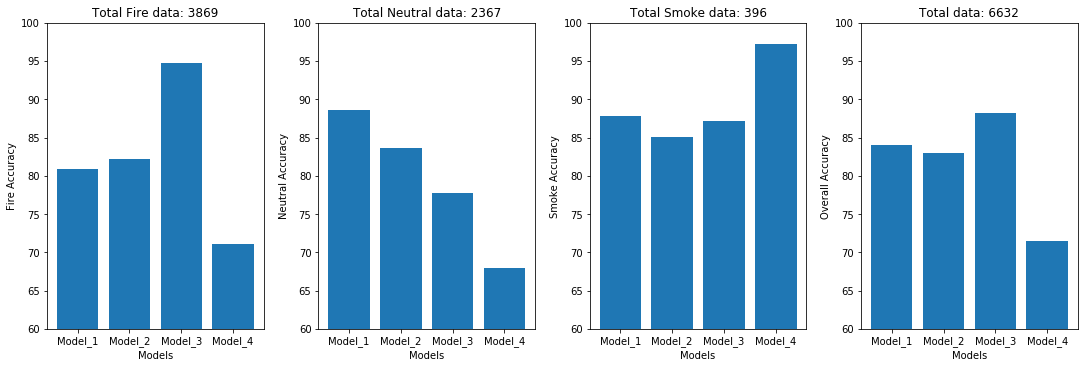

In [25]:

fire=[model1_accuracies[0],model2_accuracies[0],model3_accuracies[0],model4_accuracies[0]]
neutral=[model1_accuracies[1],model2_accuracies[1],model3_accuracies[1],model4_accuracies[1]]
smoke=[model1_accuracies[2],model2_accuracies[2],model3_accuracies[2],model4_accuracies[2]]
overall=[model1_accuracies[3],model2_accuracies[3],model3_accuracies[3],model4_accuracies[3]]
name=['Model_1','Model_2','Model_3','Model_4']

plot_model_compare_graph(fire,neutral,smoke,overall,name)


# Calculating and plotting false positive graphs towards fire

In [26]:
def plot_model_compare_graph(falsePositive,non_fire_data,name):
    
    fig, (ax0) = plt.subplots(ncols=1, constrained_layout=True, figsize=(15,5))
    
    ax0.bar(name,falsePositive)
    ax0.set_title('Total non fire data: '+str(non_fire_data))
    ax0.set_ylabel('False Positive Rate')
    ax0.set_xlabel('Models')
    ax0.set_ylim([0.0,20.0])

    plt.show()
    fig.savefig('graphs/falsePositiveComparison.pdf')



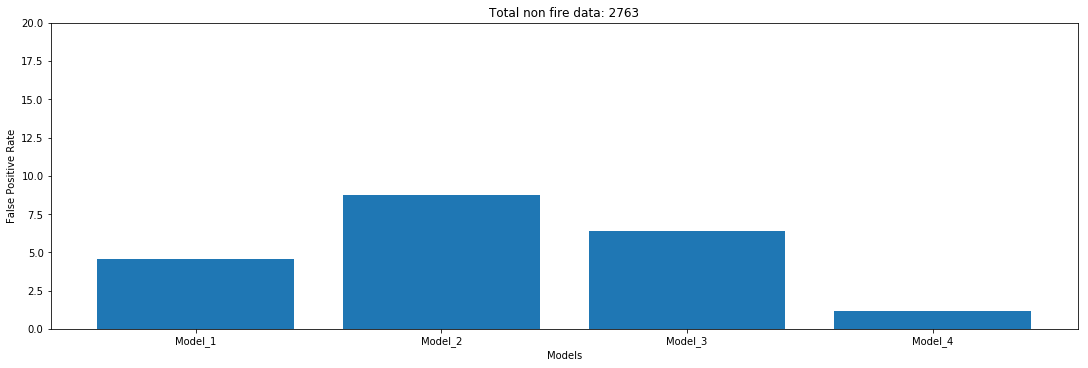

In [27]:
model1_false_positive=falsePositiveTowardsFire(model1_neutral_predictions,model1_smoke_predictions)
model2_false_positive=falsePositiveTowardsFire(model2_neutral_predictions,model2_smoke_predictions)
model3_false_positive=falsePositiveTowardsFire(model3_neutral_predictions,model3_smoke_predictions)
model4_false_positive=falsePositiveTowardsFire(model4_neutral_predictions,model4_smoke_predictions)


falsePositive=[model1_false_positive,model2_false_positive,model3_false_positive,model4_false_positive]
non_fire_data=len(model1_neutral_predictions)+len(model1_smoke_predictions)
plot_model_compare_graph(falsePositive,non_fire_data,name)


# Visualizing some predictions from test data from the finalized model

In [28]:
def show_batch(image_batch, label_batch,model,trueIds):
    true_label_ids=trueIds
    predictions = model.predict(image_batch, steps=1)
    maxpred=np.argmax(predictions, axis=-1)
    predicted_ids=maxpred
    plt.figure(figsize=(10,10))
    for n in range(5):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
        plt.title(labelDataset[predicted_ids[n]], color=color)
        plt.axis('off')

In [42]:
image_batch_test_fire, label_batch_test_fire = next(iter(TestData_generator_Fire_128))

In [43]:
image_batch_test_neutral, label_batch_test_neutral = next(iter(TestData_generator_Neutral_128))

In [44]:
image_batch_test_smoke, label_batch_test_smoke = next(iter(TestData_generator_Smoke_128))

# After proper comparison on different criterias we decided to go with model 3 as are final model for the application.

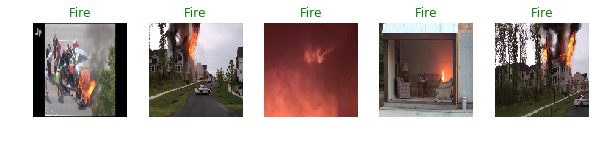

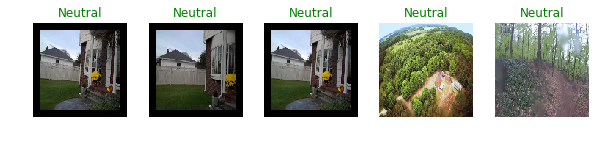

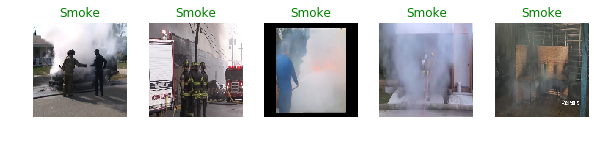

In [45]:
finalModel=model_3

trueIds=[0,0,0,0,0,0,0,0,0,0,0]
show_batch(image_batch_test_fire, label_batch_test_fire,finalModel,trueIds)

trueIds=[1,1,1,1,1,1,1,1,1,1,1]
show_batch(image_batch_test_neutral, label_batch_test_neutral,finalModel,trueIds)

trueIds=[2,2,2,2,2,2,2,2,2,2,2,2]
show_batch(image_batch_test_smoke, label_batch_test_smoke,finalModel,trueIds)
